In [1]:
import pandas as pd
import json
import numpy as np

def parse_tag_file(in_path):
    with open(in_path) as rf:
        data = json.load(rf)

    return data

def tags_to_tokens(data):
    tags_to_tokens_dict = {}
    n_taged_sents = 0 
    n_sents = 0
    

    n_tagged_tokens = 0
    n_token_per_sents = []
    for doc in data:
        for sent in doc:
            n_sents += 1
            sent_checked = False
            n_token_per_sent = 0

            for token in sent:
                n_token_per_sent += 1

                if token["tags"]:
                    if sent_checked == False:
                        n_taged_sents += 1
                        sent_checked = True

                    tagged_token = token["token"]
                    tags = token["tags"]
                    
                    for tag in tags:
                        if tag not in [counted_tag for counted_tag in tags_to_tokens_dict]:
                            tags_to_tokens_dict[tag] = [tagged_token]
                        else:
                            tags_to_tokens_dict[tag].append(tagged_token)

            n_token_per_sents.append(n_token_per_sent)                
        avg_tokens_per_sent = sum(n_token_per_sents)/n_sents

    return tags_to_tokens_dict, n_taged_sents, n_sents, avg_tokens_per_sent

def statistics(tags_to_tokens_dict, n_tagged_sents, n_sents, avg_tokens_per_sent):
    stats = {}
    n_tagged_tokens = 0
    for tag, tokens in tags_to_tokens_dict.items():
        stats[tag] = len(tokens)
        n_tagged_tokens += len(tokens)

    for tag, tokens in tags_to_tokens_dict.items():
        stats[f"ratio_{tag}"] =  np.round(len(tokens)/n_tagged_tokens, 2)

        
    stats["counts_tagged_sents"] = n_tagged_sents
    stats["counts_sents"] = n_sents
    stats["ratio_tagged_sents"] = np.round(n_tagged_sents/n_sents, 2)
    stats["avg_tagged_token_per_sent"] = np.round(n_tagged_tokens / n_sents, 2)
    stats["avg_tokens_per_sent"] = np.round(avg_tokens_per_sent, 2)
    
    return stats



In [2]:
import os

muda_output_path="/home/sumire/thesis/LLM_Contextual_Prompt_MT/data/muda_tagged"
#data_name="test.SUPPORT-DIALOG"
data_names = ["ted"]
langs = ["ar","ja", "de", "fr", "zh", "ko"]

all_data_stats = []
for data_name in data_names:
    lang_to_stats = {}
    for lang in langs:
        in_path = f"{muda_output_path}/{data_name}/{lang}/{data_name}_en{lang}.tags"
        
        if os.path.exists(in_path):
            parsed_data = parse_tag_file(in_path)
            tags_to_tokens_dict, n_tagged_sent, n_sents, avg_tokens_per_sent = tags_to_tokens(parsed_data)
            
            with open(f"{muda_output_path}/{data_name}/{lang}/{data_name}_tag_to_tokens", "a") as wf:
                wf.write(f"{tags_to_tokens_dict}")

            stats = statistics(tags_to_tokens_dict, n_tagged_sent, n_sents, avg_tokens_per_sent)
            lang_to_stats[lang] = stats
    all_data_stats.append(lang_to_stats)


In [4]:
# TED 
context_ua_stats=all_data_stats[0]
done_langs=["ar","ja", "de", "fr", "zh", "ko"]
rows = []
for lang in done_langs:
    df = pd.DataFrame(context_ua_stats[lang], index=[lang])
    rows.append(df)

context_df = pd.concat(rows)
context_df

,lexical_cohesion,pronouns,ratio_lexical_cohesion,ratio_pronouns,counts_tagged_sents,counts_sents,ratio_tagged_sents,avg_tagged_token_per_sent,avg_tokens_per_sent,formality,ratio_formality,verb_form,ratio_verb_form
ar,308,51.0,0.86,0.14,311,2506,0.12,0.14,18.25,NaN,NaN,NaN,NaN
ja,285,185.0,0.09,0.06,1916,2479,0.77,1.31,24.05,2766.0,0.85,NaN,NaN
de,753,231.0,0.44,0.14,1098,2385,0.46,0.71,18.55,719.0,0.42,NaN,NaN
fr,322,626.0,0.10,0.20,1659,2516,0.66,1.28,21.38,584.0,0.18,1676.0,0.52
zh,293,NaN,0.42,NaN,509,2502,0.20,0.28,19.64,407.0,0.58,NaN,NaN
ko,94,NaN,0.35,NaN,234,2470,0.09,0.11,14.26,174.0,0.65,NaN,NaN


In [12]:
lex_coh=context_df.loc["ar", "lexical_cohesion"]
lex_coh



308

ja
[[285, 2766.0, 185.0, nan]]
de
[[285, 2766.0, 185.0, nan], [753, 719.0, 231.0, nan]]
fr
[[285, 2766.0, 185.0, nan], [753, 719.0, 231.0, nan], [322, 584.0, 626.0, 1676.0]]
zh
[[285, 2766.0, 185.0, nan], [753, 719.0, 231.0, nan], [322, 584.0, 626.0, 1676.0], [293, 407.0, nan, nan]]
ko
[[285, 2766.0, 185.0, nan], [753, 719.0, 231.0, nan], [322, 584.0, 626.0, 1676.0], [293, 407.0, nan, nan], [94, 174.0, nan, nan]]
ar
[[285, 2766.0, 185.0, nan], [753, 719.0, 231.0, nan], [322, 584.0, 626.0, 1676.0], [293, 407.0, nan, nan], [94, 174.0, nan, nan], [308, nan, 51.0, nan]]
[[ 285. 2766.  185.   nan]
 [ 753.  719.  231.   nan]
 [ 322.  584.  626. 1676.]
 [ 293.  407.   nan   nan]
 [  94.  174.   nan   nan]
 [ 308.   nan   51.   nan]]


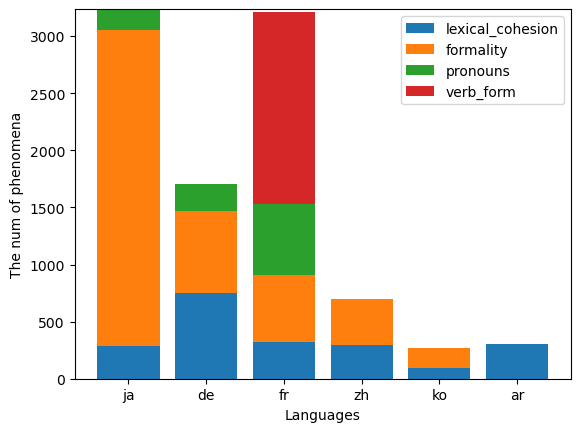

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories =['lexical_cohesion', 'formality', 'pronouns', 'verb_form'] # categories
bar_labels =  [ "ja", "de", "fr", "zh", "ko", "ar"] # lang

lang_values_list=[]
for lang in bar_labels:
    print (lang)
    lang_values = []
    
    for cat in categories:
        lang_cat_value=context_df.loc[lang, cat]
        lang_values.append(lang_cat_value)
    lang_values_list.append(lang_values)
    print (lang_values_list)
    
data = np.array(lang_values_list)
print (data)
# data = np.array([
#     [815, 239, 7, 0], # ja
#     [259, 174, 73, 0], # de
#     [272, 212, 229, 265], #fr
# ])

# Create a bar plot
fig, ax = plt.subplots()


# Plot each bar with stacked categories
ax.bar(bar_labels, data[:, 0], label=categories[0]) # formality
ax.bar(bar_labels, data[:, 1], bottom=data[:, 0], label=categories[1]) # lexical_cohesion
ax.bar(bar_labels, data[:, 2], bottom=data[:, 0] + data[:, 1], label=categories[2]) # pronouns
ax.bar(bar_labels, data[:, 3], bottom=data[:, 0] + data[:, 1] + data[:, 2], label=categories[3]) # verb_form

# Add labels and legend
ax.set_xlabel('Languages')
ax.set_ylabel('The num of phenomena')
#ax.set_title('The number of phenomena in test set')
ax.legend()

# Show the plot
plt.show()
